### Today’s Objectives:
 - Implementation of Hierarchical Clustering
### Dataset Link : https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Universities.csv
- K-Means Clustering

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
univ=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Universities.csv")
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
univ.shape

(25, 7)

In [4]:
# Scale down the data
normalized_data=scale(univ.iloc[:,1:])
normalized_data

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

## Apply KMeans model:

In [11]:
# Running KMeans algorithm
from sklearn.cluster import KMeans
Kmeans= KMeans(n_clusters=i, init='k-means++', random_state=0)
Kmeans.fit(normalized_data)


KMeans(n_clusters=5, random_state=0)

## ELBOW METHOD

In [12]:
# Running KMeans algorithm multiple times to obtain the feasible K value
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,6):
    Kmeans= KMeans(n_clusters=i, init='k-means++', random_state=0)
    Kmeans.fit(normalized_data)
    wcss.append(Kmeans.inertia_)
wcss

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 28.622383307274234]

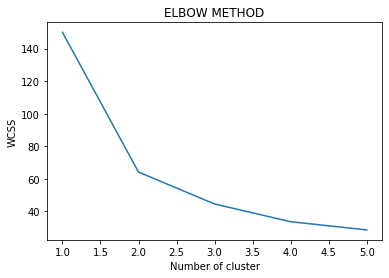

In [13]:
#optimum number
# plot of wcss vs k values
plt.plot(range(1,6),wcss)
plt.title('ELBOW METHOD')
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [8]:
Kmeans.labels_

array([3, 2, 4, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 1, 0,
       0, 1, 3])

In [15]:
cluster=pd.DataFrame(Kmeans.labels_)
cluster

,0
0,3
1,2
2,4
3,0
4,0
5,3
6,3
7,0
8,3
9,2


In [17]:
univ['cluster']=cluster
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster
0,Brown,1310,89,22,13,22704,94,3
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,4
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [24]:
univ1=univ.iloc[:,[7,0,1,2,3,4,5,6]]
univ1.head()

,cluster,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,3,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,4,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [22]:
# Aggregate the cluster means
# find best cluster using groupby cluster then find the mean
univ1.iloc[:,2:].groupby(univ1.cluster).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
cluster,,,,,,
0,1266.666667,80.666667,36.888889,12.888889,23455.111111,88.888889
1,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1356.875000,91.125000,21.500000,10.875000,33878.750000,94.500000
4,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


In [ ]:
# in this aggregate cluste we find the good an bad cluster
# 3---> best cluster -->analyze based on good accuracy to another all cluster
# 1   ---> poor cluster --> analyze based on poor accuracy to another all cluster